# Notebook para generar csv de evaluacion

 ## **Hackaton RIIAA 2021 Reto 1**  
 Mejora de calidad de la imagen y clasificación  
 **Equipo:** Pista latente ML  
 **Integrantes:**  
       - Andrea Berenice Ek Hobak  
       - Gabriela Marali Mundo Cortes  
       - Mario Xavier Canche Uc  
       - Myrna Citlali Castillo Silva  
       - Ramon Sidonio Aparicio Garcia  

## Montamos carpeta en Drive

In [1]:
# Montamos el Drive al Notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Verificamos el directorio en el que nos encontramos
!pwd
!ls

/content
drive  sample_data


In [3]:
# Cambiamos de directorio al Drive
import os
os.chdir("drive/MyDrive/Hackaton2021/codigo/Entregables/Reto1")
!ls

ExtractFeatures.py  Genera_Entregable_Reto1.ipynb  output  __pycache__


## Instalamos las librerias

In [4]:
!pip install kneed

In [5]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 6.0 MB/s 
     |████████████████████████████████| 22.3 MB 5.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Cargamos las librerias

In [56]:
# Cargamos las librerias
import PIL.Image
from os import listdir
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from kneed import KneeLocator  #Librería para calcular el punto de codo de curva
from sklearn import metrics

# Cargamos nuestra libreria de extraccion de caracteristicas 
from ExtractFeatures import extract_features_vgg16


## Cargamos las rutas de las imagenes a procesar

In [7]:
# Rutas de las imagenes
path_dir = '../../../Datos - Hackathon JusticIA/Evaluacion/Reto1'

archivos = listdir(path_dir)

In [8]:
archivos

['AGN_DFS_C.240_Sanchez_Fuerte_Maria_Marcela_pg-000.jpg',
 'AGN_DFS_C.160_Murillo_de_Ramirez_Juventina_Martha_pg-002.jpg',
 'AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-084.jpg',
 'AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-082.jpg',
 'AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-326.jpg',
 'AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-096.jpg',
 'AGN_DFS_C.189_Padilla_Rivera_Rebeca_pg-001.jpg',
 'AGN_DFS_C.184_Tecla_Parra_Violeta_pg-014.jpg',
 'AGN_DFS_C.160_Murillo_de_Ramirez_Juventina_Martha_pg-005.jpg',
 'AGN_DFS_C.151_Morales_Lopez_Delia_pg-025.jpg',
 'AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-093.jpg',
 'AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-049.jpg',
 'AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-126.jpg',
 'AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-103.jpg',
 'AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-002.jpg',
 'Ficheros_ACNR_militantes_Olea_Castaneyra_Rafel_Olea_Castaneyra_Rafael,_ACNR-19-.JPG',
 'Ficheros_Detenidos_Desaparecidos_Morales_Lopez_Delia_Morales_Lopez_Delia-23-.JPG',

## Procesamos las imágenes y extraemos las características



In [9]:
# Nombre del csv de salida con los resultados
archivo_out = "output/features_vgg16.csv"
"""
data = []
# Iteramos todos los archivos a procesar
for i, archivo in enumerate(archivos):

        # Creamos el path de la imagen
        file_name = path_dir + '/' + archivo
        print("-- procesando: ", file_name, "\t\t ", 100*(i+1)/len(archivos) , " %")

        # Extraemos las caractetisticas
        features = extract_features_vgg16(file_name)
        
        data += features

print("-- Finalizado con exito!!! 100%")

# Convertimos DataFrame y Guardamos
output = pd.DataFrame(data)
output.to_csv(archivo_out, index=False, header=False)
print("-- Guardado exitosamente!!!")
"""

'\ndata = []\n# Iteramos todos los archivos a procesar\nfor i, archivo in enumerate(archivos):\n\n        # Creamos el path de la imagen\n        file_name = path_dir + \'/\' + archivo\n        print("-- procesando: ", file_name, "\t\t ", 100*(i+1)/len(archivos) , " %")\n\n        # Extraemos las caractetisticas\n        features = extract_features_vgg16(file_name)\n        \n        data += features\n\nprint("-- Finalizado con exito!!! 100%")\n\n# Convertimos DataFrame y Guardamos\noutput = pd.DataFrame(data)\noutput.to_csv(archivo_out, index=False, header=False)\nprint("-- Guardado exitosamente!!!")\n'

In [10]:
# Procesar una sola imagen
#archivo_scr = "../../Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-279.jpg"

#data = extract_features_vgg16(archivo_scr)

## Analizamos las caracteristicas

In [11]:
# Preparamos los datos
#data_raw = pd.DataFrame(data)
data_raw = pd.read_csv(archivo_out, header=None)

# Features
label = data_raw.iloc[:,:5]
print(label.head())

# Datos de la Imagen y region
data = data_raw.iloc[:,5:]
data.head()

                                                   0    1    2     3     4
0  ../../../Datos - Hackathon JusticIA/Evaluacion...    0   75     0  2109
1  ../../../Datos - Hackathon JusticIA/Evaluacion...    0   10  2524  3090
2  ../../../Datos - Hackathon JusticIA/Evaluacion...   20   34  2179  2220
3  ../../../Datos - Hackathon JusticIA/Evaluacion...   26   40  2000  2038
4  ../../../Datos - Hackathon JusticIA/Evaluacion...  518  611  1331  1465


5    6    7    8         9    ...  512  513  514       515  516
0  0.00000  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0
1  2.98946  0.0  0.0  0.0  0.795298  ...  0.0  0.0  0.0  0.000000  0.0
2  0.00000  0.0  0.0  0.0  9.610129  ...  0.0  0.0  0.0  1.747667  0.0
3  0.00000  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0
4  0.00000  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0

[5 rows x 512 columns]

In [12]:
# Filtramos las columnas de ceros
data = data.loc[:, (data != 0).any(axis=0)]

# Eliminamos columnas constantes
data = data.loc[:, data.var(axis=0)!=0]

data.shape

(26275, 512)

In [13]:
"""
for name in np.unique(label.iloc[:,0]):
    print(name)

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    plt.figure(figsize=(12,10))
    plt.imshow(image)
    plt.show()
"""

'\nfor name in np.unique(label.iloc[:,0]):\n    print(name)\n\n    # Abrimos la imagen\n    image = PIL.Image.open(name).convert("RGB")\n    image = np.array(image)\n\n    plt.figure(figsize=(12,10))\n    plt.imshow(image)\n    plt.show()\n'

In [14]:
colores = [(255,0,0),
           (0,0,255),
           (0,255,0),
           (255,255,0),
           (120,0,120),
           (255,0,255),
           (0,255,255),
           (255,120,0),
           (0,120,255),
           (120,0,255),
           (0,120,120),
           (120,120,0),
          (120,120,120),
          (255,120,120),
          (120,255,120),
          (120,120,255)
          ]

len(colores)

16

## Proyeccion PCA

In [15]:
# Configuramos el PCA
#pca = PCA(n_components=2)
#pca = PCA(0.96)
pca = PCA(0.99)

# Proyectamos con los componentes principales
X_pca = pca.fit_transform(data)
ratio = pca.explained_variance_ratio_

In [16]:
# Total de componentes que explican el 96% de la varianza
ratio.shape

(353,)

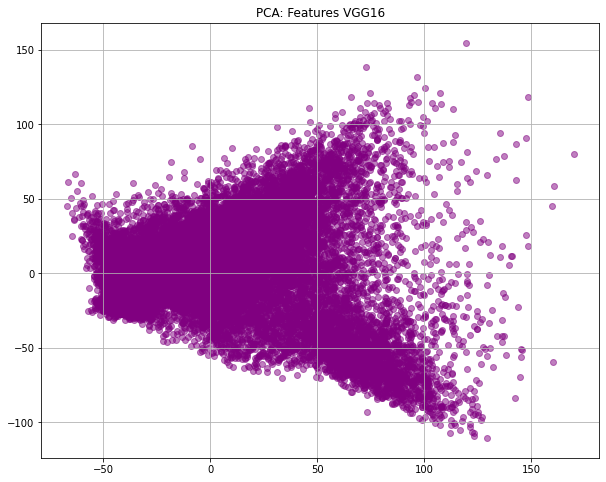

In [17]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
plt.title('PCA: Features VGG16')
plt.scatter(x = X_pca[:,0], y = X_pca[:,1], marker = 'o', color = "purple", alpha = 0.5)

plt.grid()
plt.show()

## Clustering

In [18]:
# Clusterizamos para formar clases
kmeans = KMeans(n_clusters=16, random_state=0)
kmeans_fit = kmeans.fit(X_pca)

#kmeans = AgglomerativeClustering(n_clusters=8,distance_threshold=None,linkage="ward")
#kmeans_fit = kmeans.fit(X_pca)

kmeans_fit.labels_

array([5, 5, 5, ..., 5, 5, 5], dtype=int32)

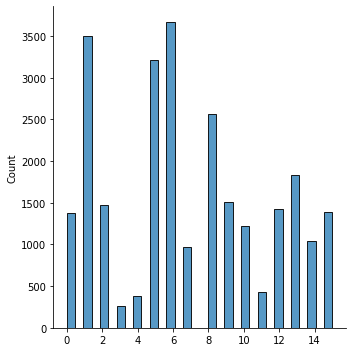

In [19]:
sns.displot(kmeans_fit.labels_)

In [20]:
# Creamos el csv de salida
archivo_out2 = "output/Evaluacion_Reto1.csv"

df = pd.DataFrame([["filename", "width", "height", "class", "xmin", "ymin", "xmax", "ymax"]])
df.to_csv(archivo_out2, index=False, header=False)

def get_width_and_height(file_name):
    image = PIL.Image.open(file_name)
    return image.size

In [21]:
aaaaa

NameError: ignored

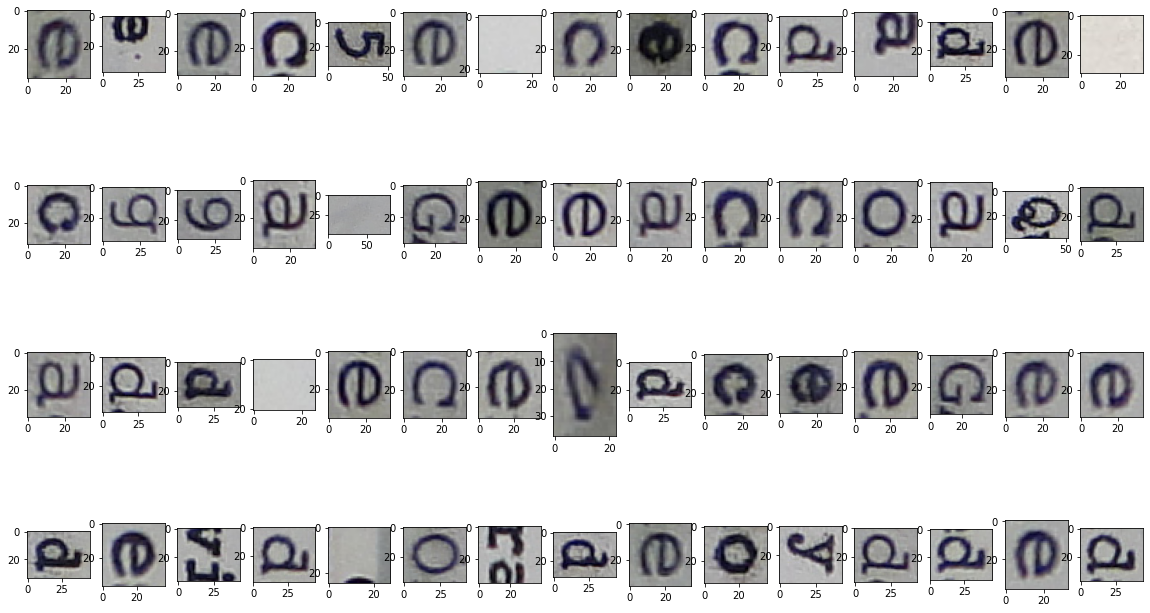

(60, 5)

In [44]:
# Observamos los elementos del cluster
kk = 0
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

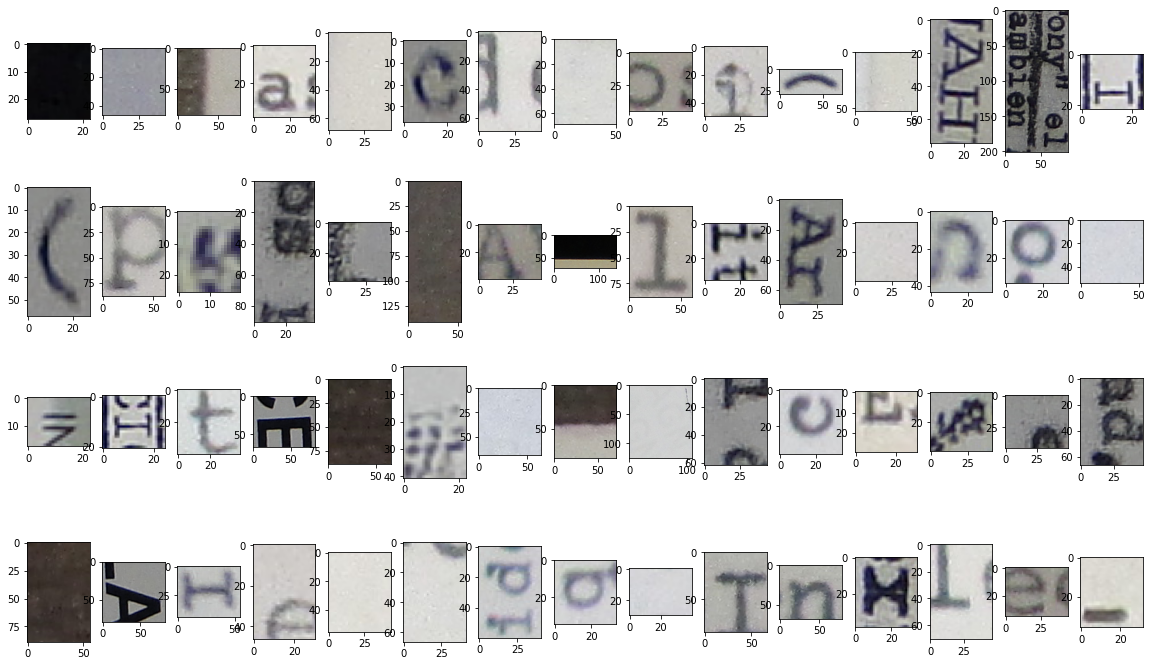

(60, 5)

In [45]:
# Observamos los elementos del cluster
kk = 1
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1
    
    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

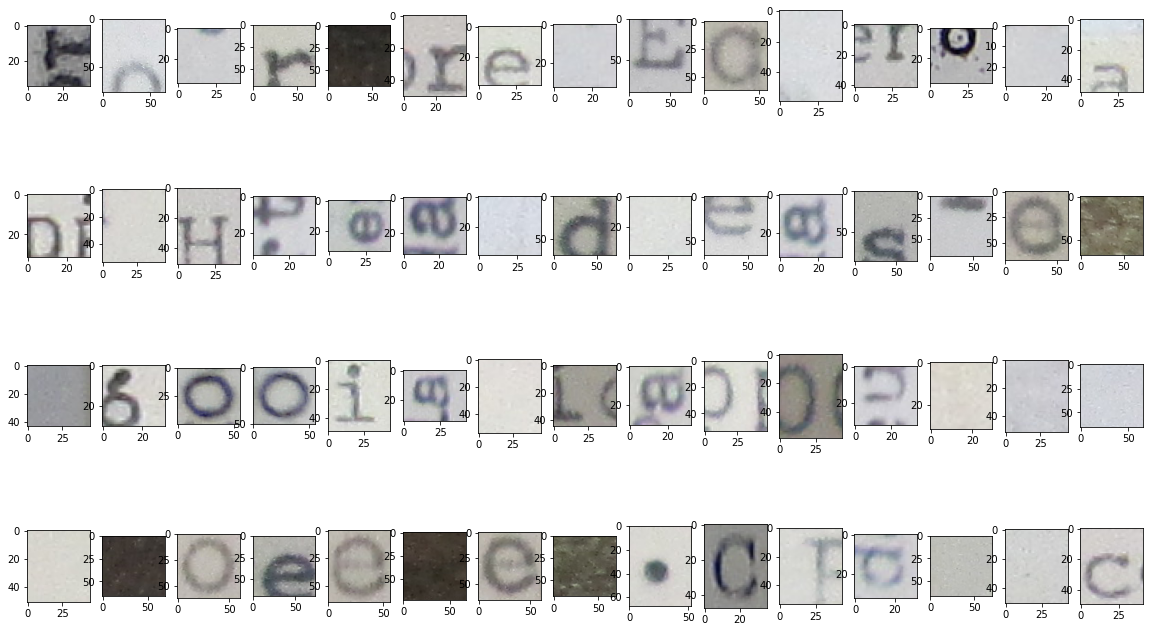

(60, 5)

In [46]:
# Observamos los elementos del cluster
kk = 2
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')
plt.show()

samp.shape

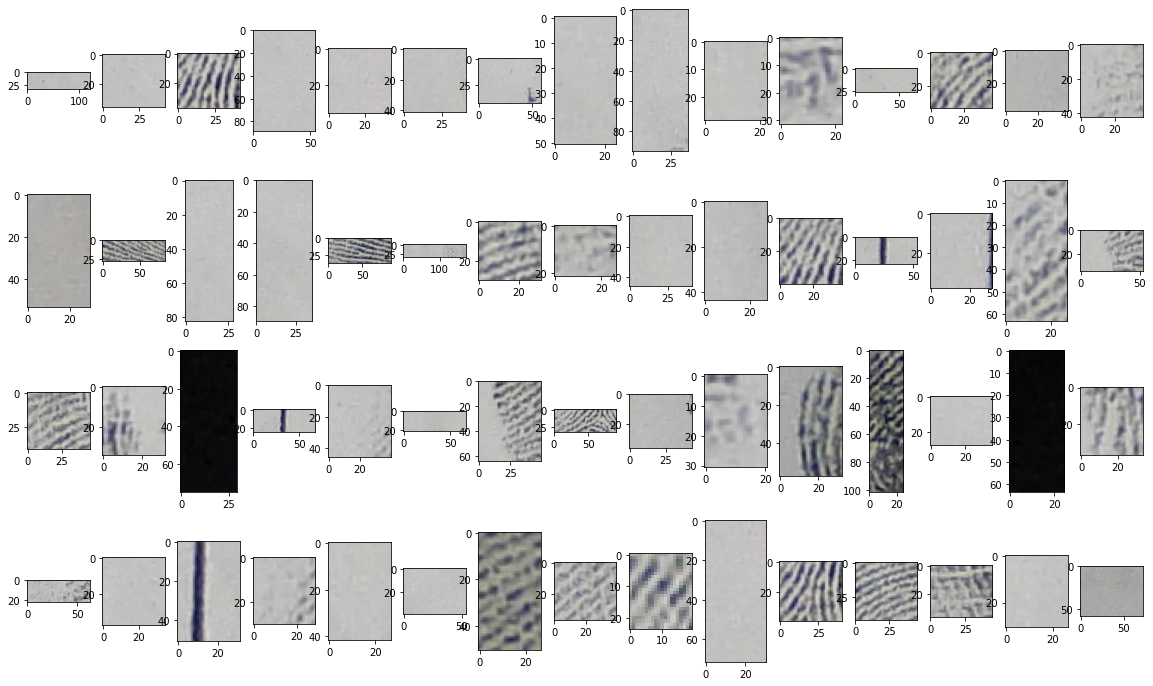

(60, 5)

In [41]:
# Observamos los elementos del cluster
kk = 3
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Fingerprints", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

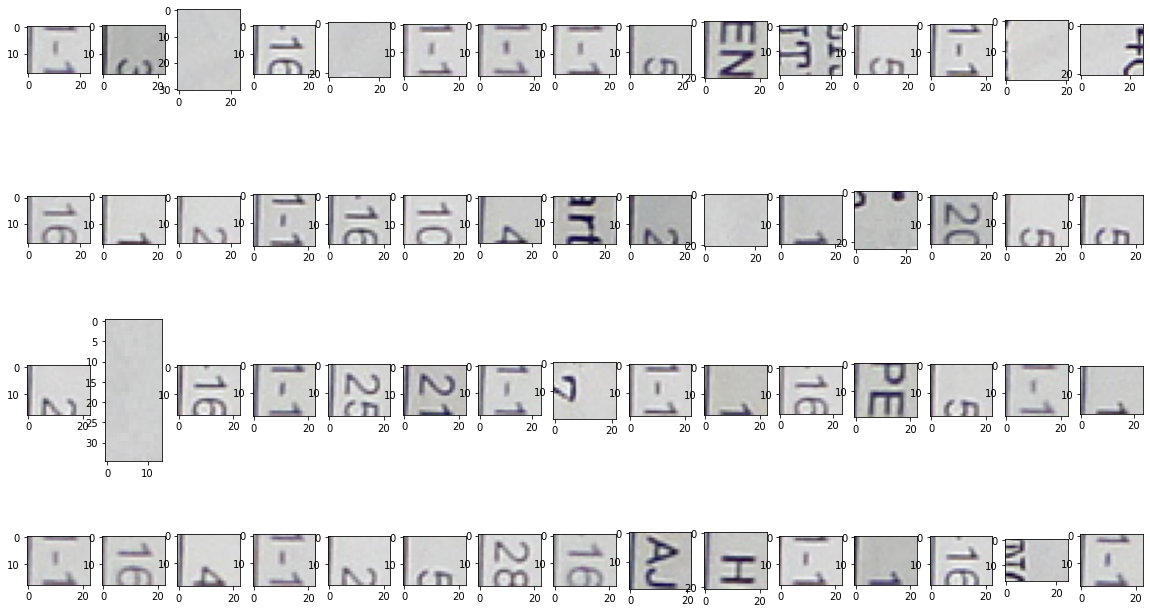

(60, 5)

In [47]:
# Observamos los elementos del cluster
kk = 4
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

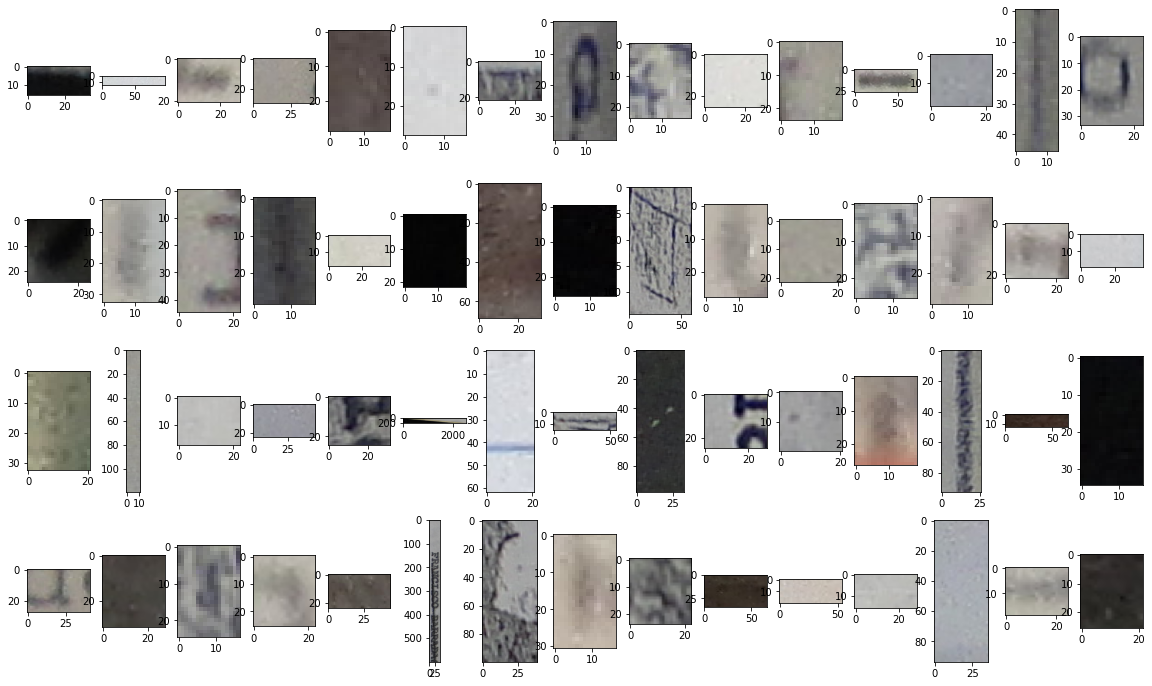

(60, 5)

In [42]:
# Observamos los elementos del cluster
kk = 5
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Lines", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

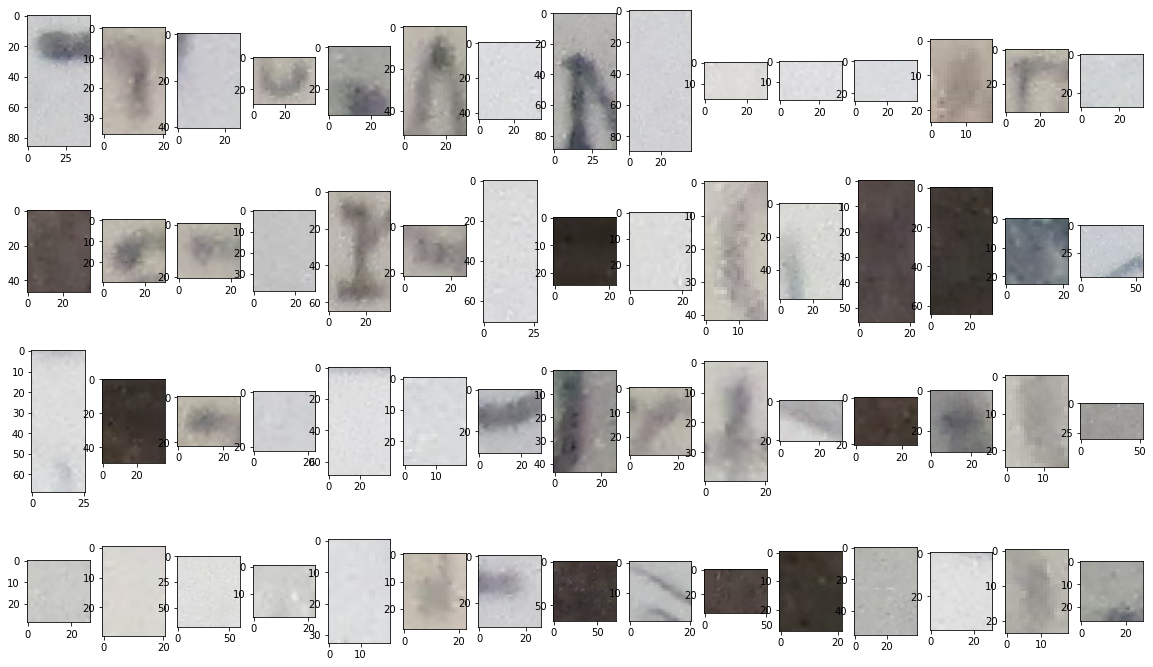

(60, 5)

In [39]:
# Observamos los elementos del cluster
kk = 6
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Handwritting", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

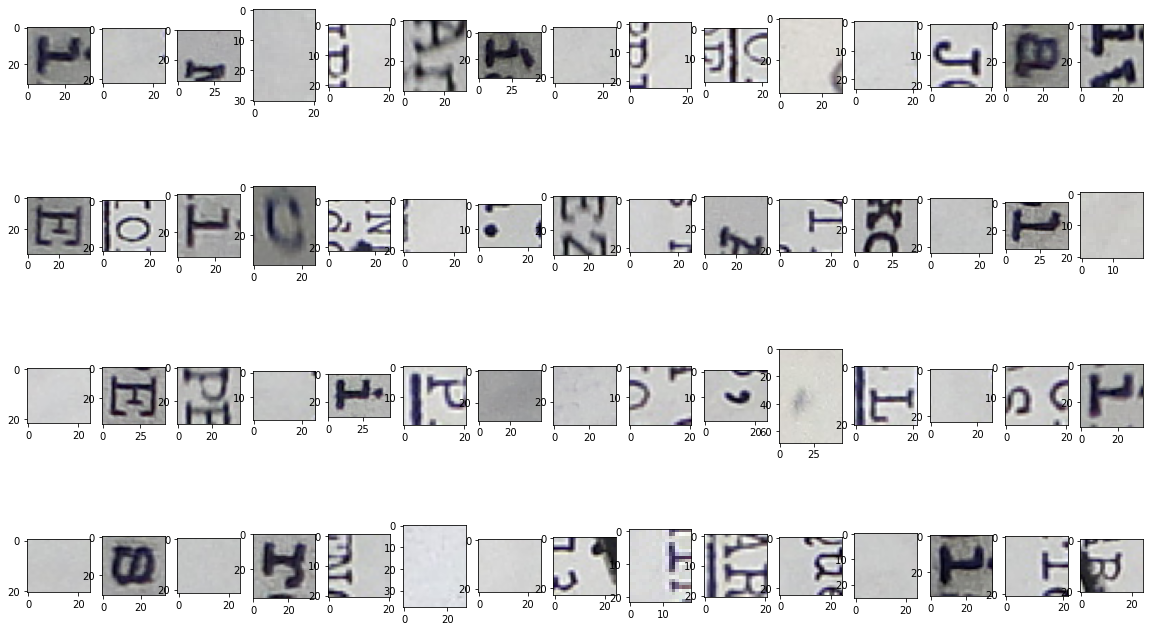

(60, 5)

In [48]:
# Observamos los elementos del cluster
kk = 7
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

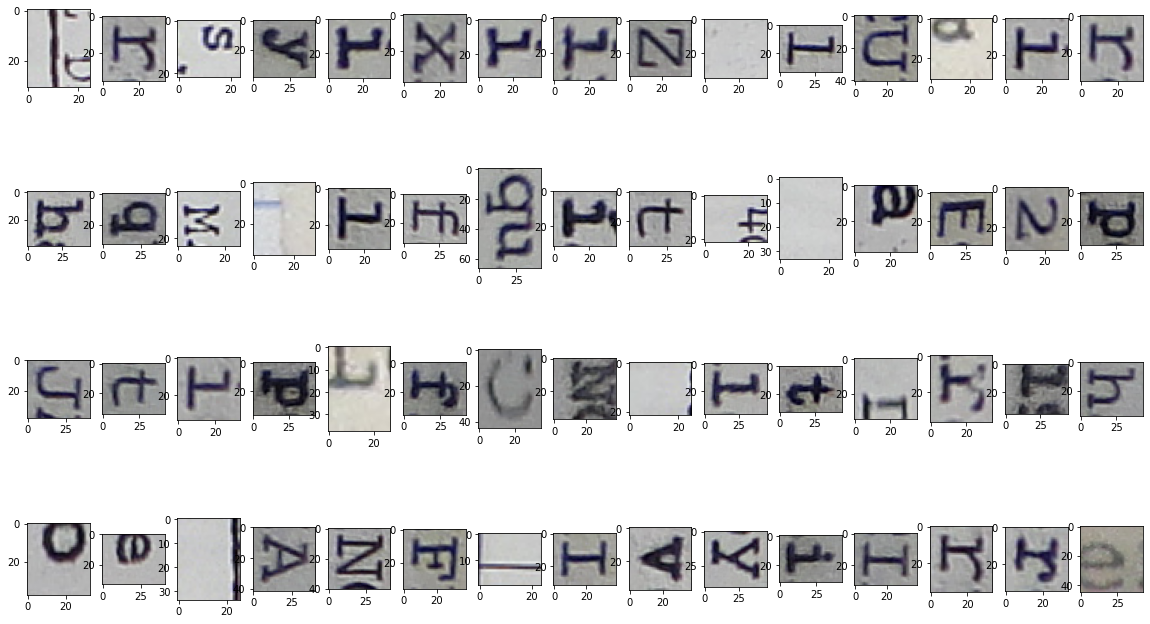

(60, 5)

In [49]:
# Observamos los elementos del cluster
kk = 8
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

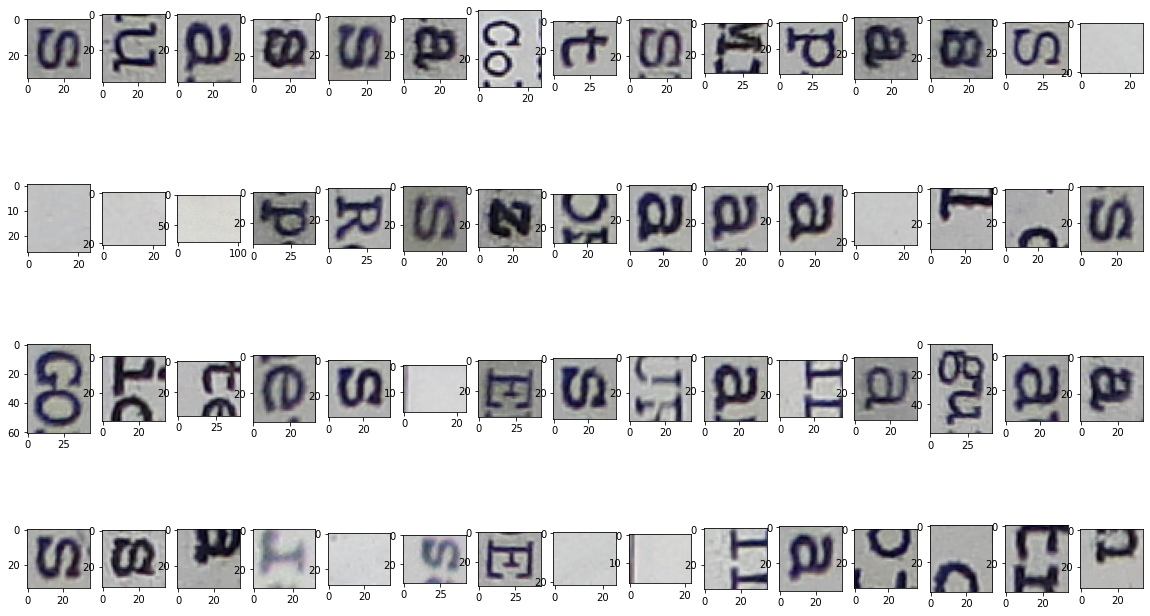

(60, 5)

In [50]:
# Observamos los elementos del cluster
kk = 9
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

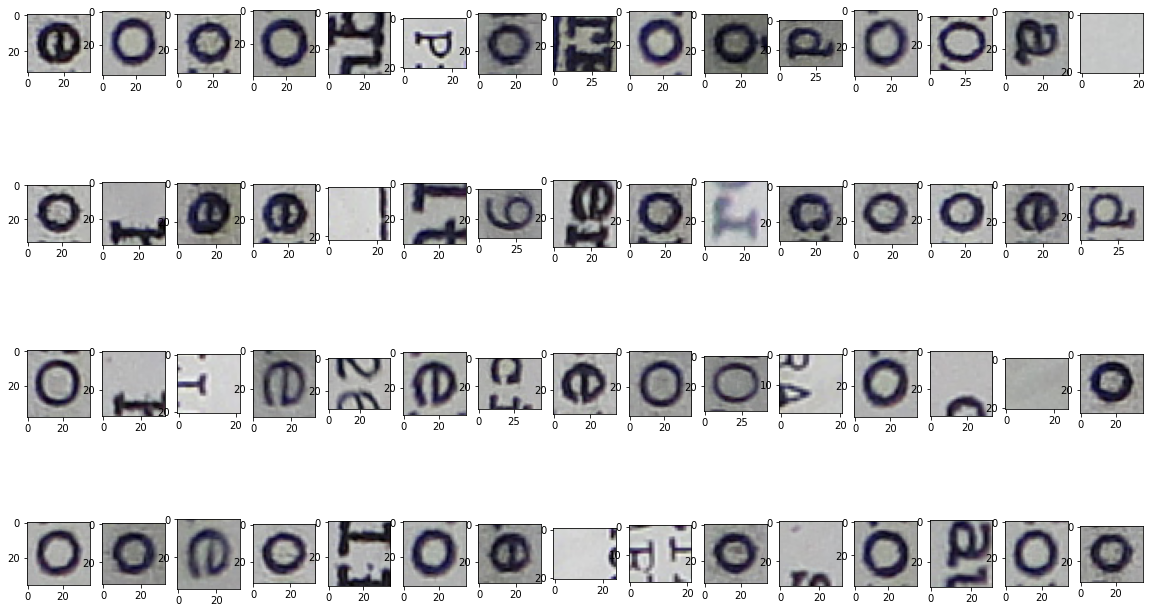

(60, 5)

In [51]:
# Observamos los elementos del cluster
kk = 10
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

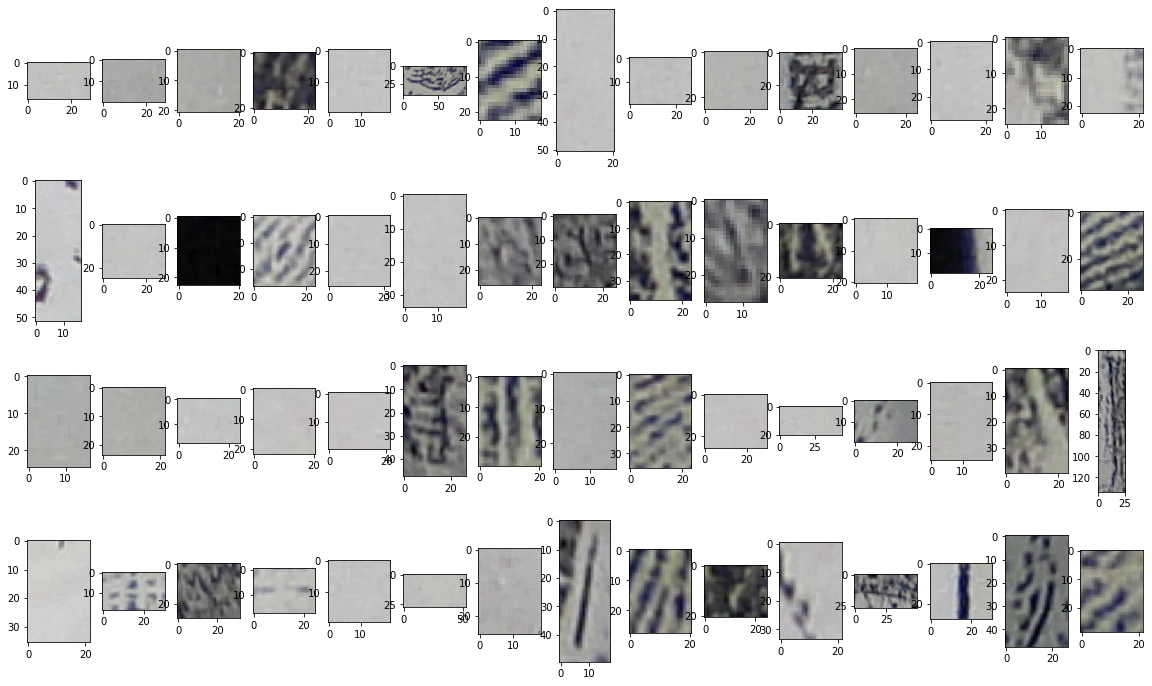

(60, 5)

In [40]:
# Observamos los elementos del cluster
kk = 11
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Fingerprints", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

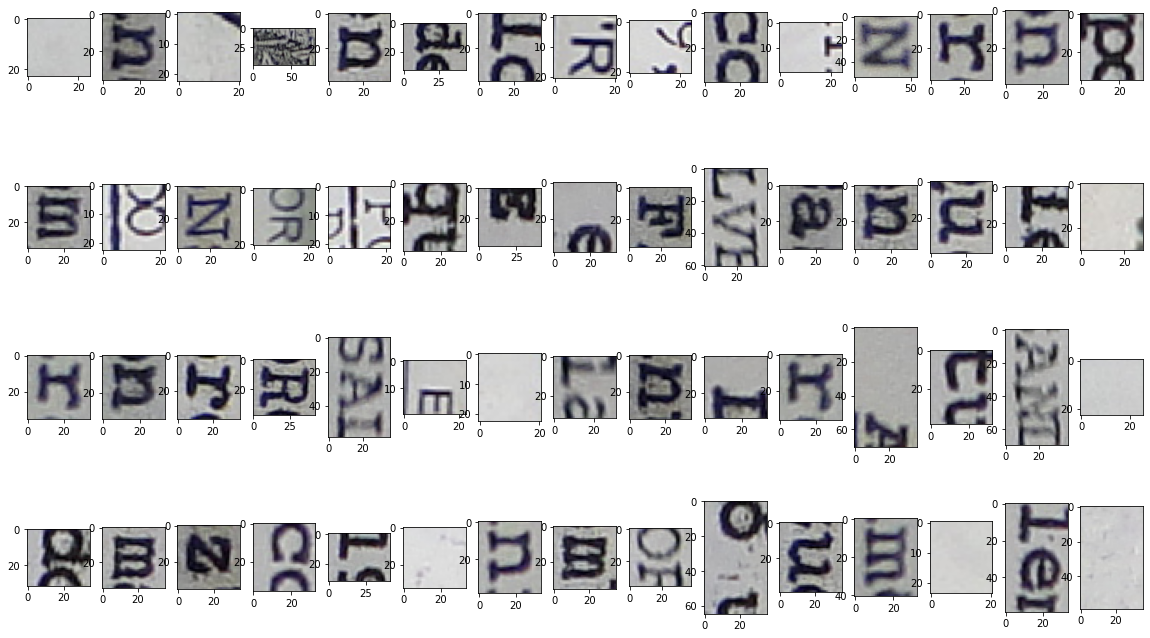

(60, 5)

In [52]:
# Observamos los elementos del cluster
kk = 12
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

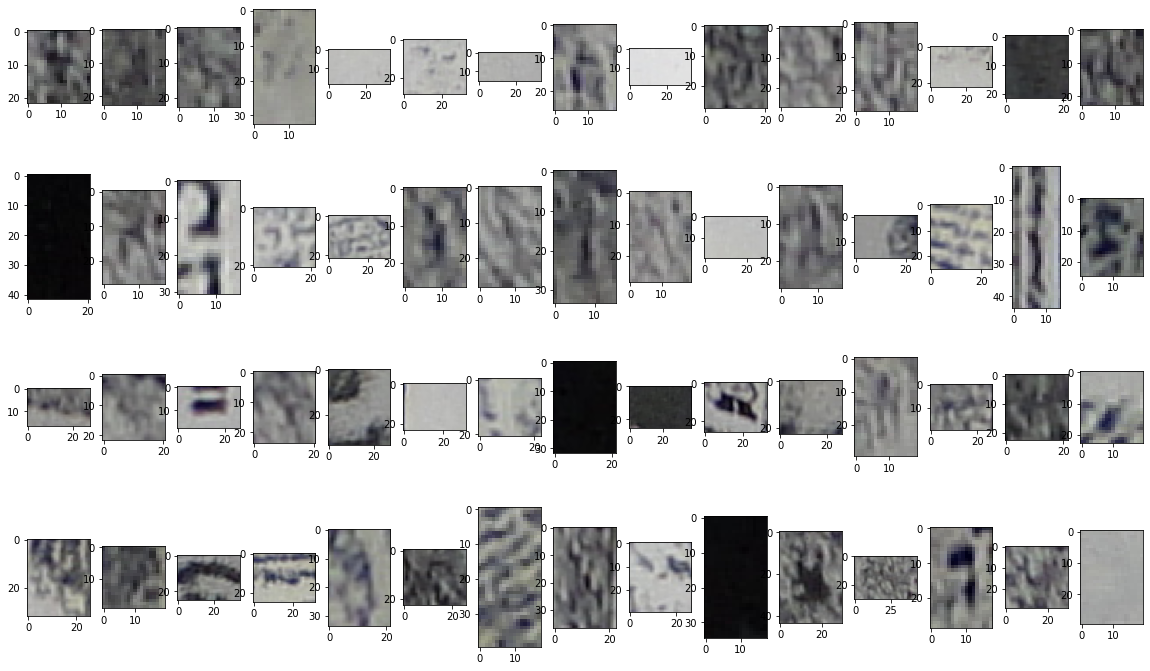

(60, 5)

In [38]:
# Observamos los elementos del cluster
kk = 13
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "stamp", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

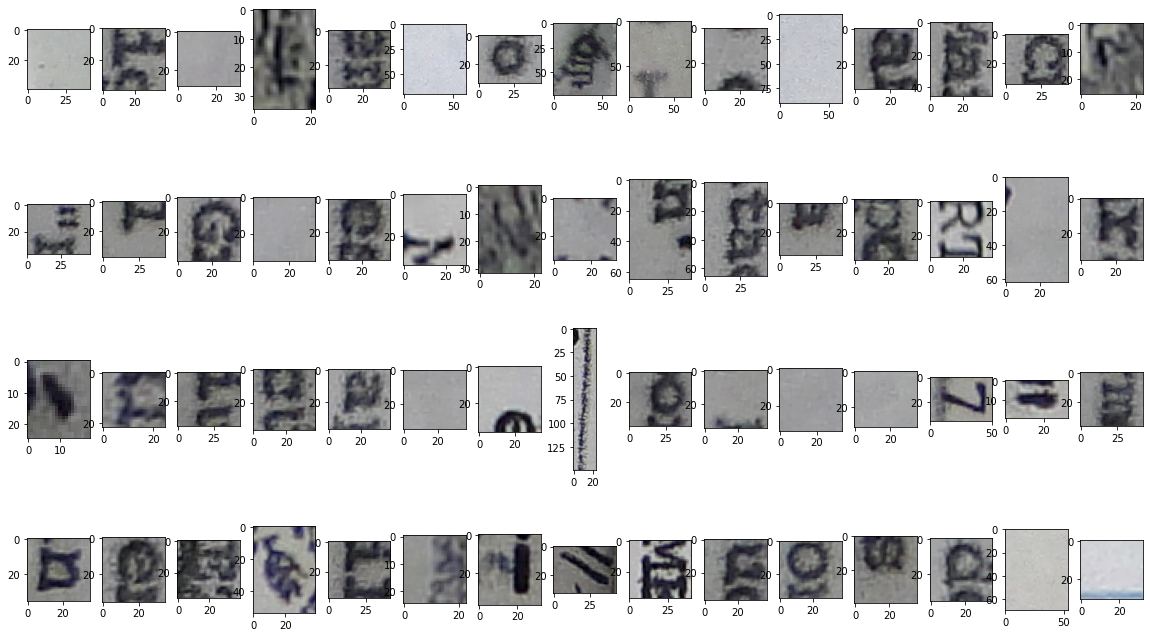

(60, 5)

In [53]:
# Observamos los elementos del cluster
kk = 14
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Letters", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

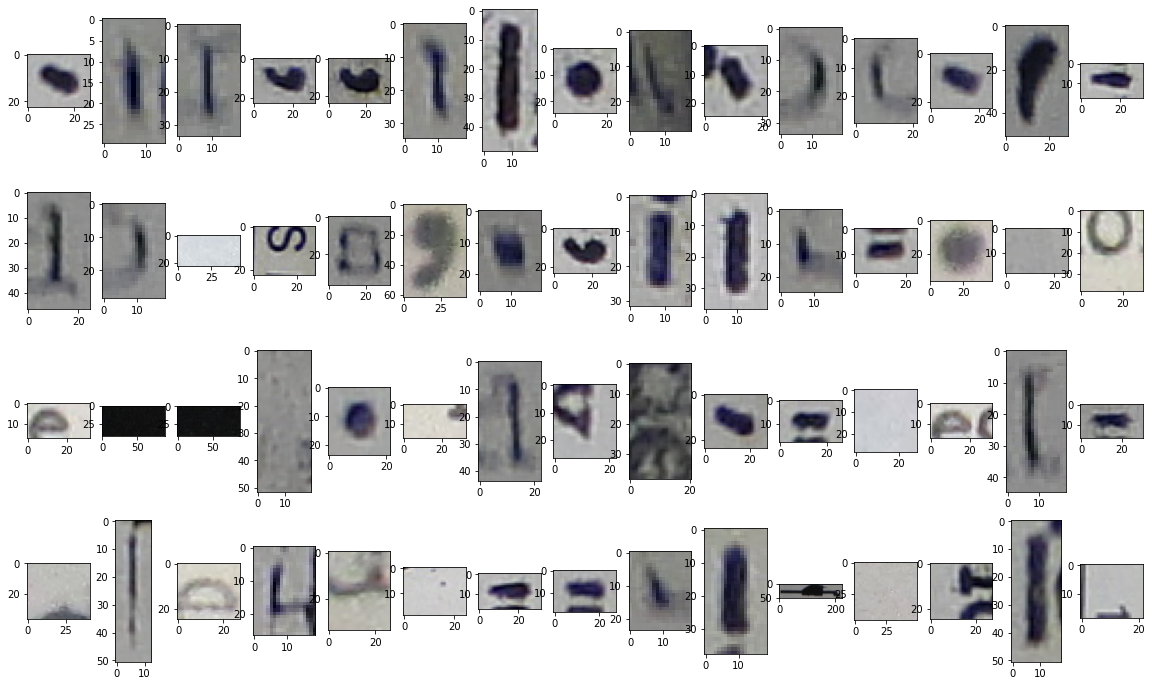

(60, 5)

In [43]:
# Observamos los elementos del cluster
kk = 15
samp = label[kmeans_fit.labels_== kk].sample(n = 60)

n = samp.shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

cont = 0
for i, (name, a,b,c,d) in samp.iterrows():

    # Abrimos la imagen
    image = PIL.Image.open(name).convert("RGB")
    image = np.array(image)

    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[cont%15].imshow(roi)
    else:
        axs[cont//15,cont%15].imshow(roi)
    cont += 1

    width, height = get_width_and_height(name)
    df = pd.DataFrame([[name, width, height, "Lines", c, a, d, b]])
    df.to_csv(archivo_out2, index=False, header=False, mode='a')

plt.show()

samp.shape

## Métricas para evaluar clustering

In [57]:
#Total Within Cluster Sum of Squares
def calculateWCSS(X,labels):
  twss = 0
  for l in np.unique(labels):
    Xl = X.iloc[labels == l,:]
    m = np.mean(Xl)
    Xq = Xl - m
    Xq2 = Xq*Xq
    s = np.sum(np.sum(Xq2))
    twss = twss + s
  return(twss)

In [58]:
X_pca = pd.DataFrame(X_pca)

#Rango de grupos
GRange = np.arange(2,21)

#Para guardar los resultados de las métricas
WCSS = []
Silhouette = []
CalinskiHarabasz = []
DaviesBouldin = []

#Guardar Etiquetas
labelsK = []

for k in GRange:
  #Generamos un agrupamiento con k grupos
  #clustering = AgglomerativeClustering(n_clusters=k,distance_threshold=None,linkage="ward").fit(X_pca)
  clustering = KMeans(n_clusters=k, random_state=0).fit(X_pca)

  #Obtenemos las etiquetas
  labels = clustering.labels_

  #Calculamos las métricas, no todas funcionan con k=1
  wcss = calculateWCSS(X_pca,labels)
  if k>1:
    s = metrics.silhouette_score(X_pca, labels, metric='euclidean')
    ch = metrics.calinski_harabasz_score(X_pca, labels)
    db = metrics.davies_bouldin_score(X_pca, labels)
  else:
    s = 0
    ch = 0
    db = 0

  #Concatenamos las métricas 
  WCSS.append(wcss)
  Silhouette.append(s)
  CalinskiHarabasz.append(ch)
  DaviesBouldin.append(db)

  labelsK.append(labels)


WCSS: Mide la dispersión de los grupos con la suma de cuadrados.


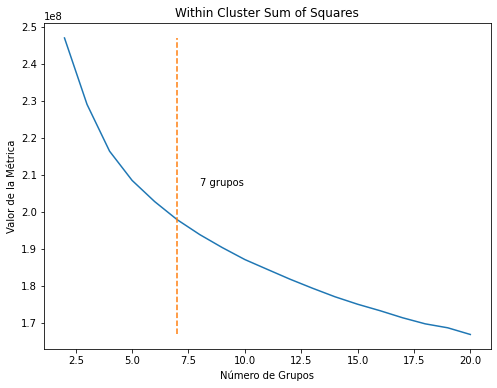

Calinski-Harabasz: Mide si los grupos están bien definidos con sum of between-clusters dispersion and of within-cluster dispersion for all clusters.


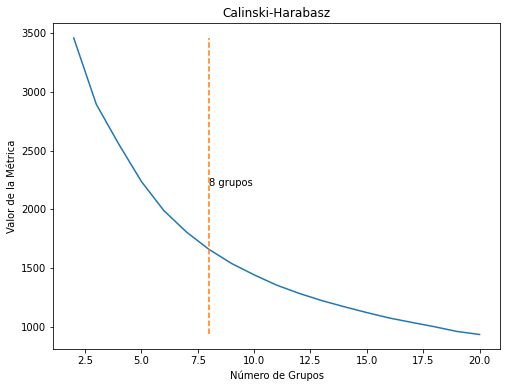

Silhouette: Mide si los grupos están bien definidos con base en la distancia a los elementos de la misma clase y del grupo más cercano.


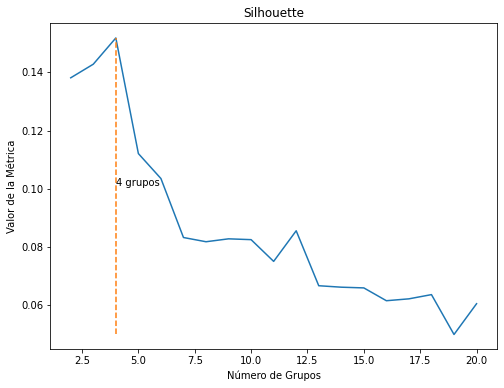

Davies-Bouldin: Mide la separación entre grupos, considerando la distancia entre los grupos y su tamaño.


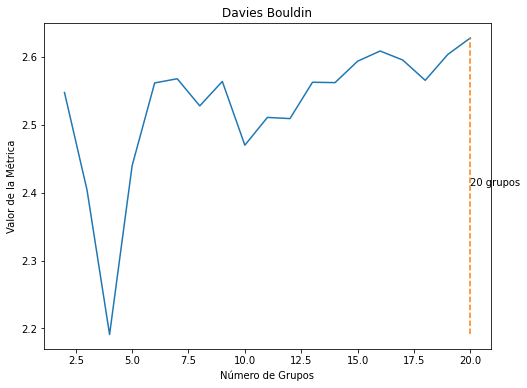

In [59]:
#WCSS
print("WCSS: Mide la dispersión de los grupos con la suma de cuadrados.")
metrc = WCSS
k = KneeLocator(GRange, metrc, S=1.0, curve="convex", direction="decreasing")
fig1 = plt.figure(1, figsize=(8, 6))
plt.plot(GRange,metrc)
plt.plot([k.elbow,k.elbow],[min(metrc),max(metrc)],'--')
plt.title("Within Cluster Sum of Squares")
plt.xlabel("Número de Grupos")
plt.ylabel("Valor de la Métrica")
plt.text(k.elbow+1,min(metrc) + 0.5*np.ptp(metrc),str(k.elbow) + " grupos")
plt.show()

#Calinski-Harabasz
print("Calinski-Harabasz: Mide si los grupos están bien definidos con sum of between-clusters dispersion and of within-cluster dispersion for all clusters.")
metrc = CalinskiHarabasz
GRanges = GRange
k = KneeLocator(GRanges, metrc, S=1.0, curve="convex", direction="decreasing")
fig1 = plt.figure(1, figsize=(8, 6))
plt.plot(GRanges,metrc)
plt.plot([k.elbow,k.elbow],[min(metrc),max(metrc)],'--')
plt.title("Calinski-Harabasz")
plt.xlabel("Número de Grupos")
plt.ylabel("Valor de la Métrica")
plt.text(k.elbow,min(metrc) + 0.5*np.ptp(metrc),str(k.elbow) + " grupos")
plt.show()

#Silhouette
print("Silhouette: Mide si los grupos están bien definidos con base en la distancia a los elementos de la misma clase y del grupo más cercano.")
metrc = Silhouette
GRanges = GRange
k = GRanges[np.argmax(metrc)]
fig1 = plt.figure(1, figsize=(8, 6))
plt.plot(GRanges,metrc)
plt.plot([k,k],[min(metrc),max(metrc)],'--')
plt.title("Silhouette")
plt.xlabel("Número de Grupos")
plt.ylabel("Valor de la Métrica")
plt.text(k,min(metrc) + 0.5*np.ptp(metrc),str(k) + " grupos")
plt.show()

#DaviesBouldin
print("Davies-Bouldin: Mide la separación entre grupos, considerando la distancia entre los grupos y su tamaño.")
metrc = DaviesBouldin
GRanges = GRange
k = GRanges[np.argmax(metrc)]
fig1 = plt.figure(1, figsize=(8, 6))
plt.plot(GRanges,metrc)
plt.plot([k,k],[min(metrc),max(metrc)],'--')
plt.title("Davies Bouldin")
plt.xlabel("Número de Grupos")
plt.ylabel("Valor de la Métrica")
plt.text(k,min(metrc) + 0.5*np.ptp(metrc),str(k) + " grupos")
plt.show()